# **Exploratory Data Analysis**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso

## **Data** **Upload**

In [ ]:
file_path = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1032,69622,Female,8.0,0,0,No,children,Urban,65.32,18.4,Unknown,0
2073,49615,Female,12.0,0,0,No,children,Urban,58.14,21.3,never smoked,0
1531,49709,Female,77.0,1,0,Yes,Self-employed,Rural,238.53,30.6,never smoked,0
5096,41512,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
1668,71044,Female,8.0,0,0,No,children,Rural,71.63,16.3,Unknown,0


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.describe(include= 'object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## **Data Cleaning**



### Missing/Null Values

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


BMI has missing values, while other columns have no major missing data issues.

In [ ]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)



/tmp/ipython-input-3427054390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


BMI filled with median values

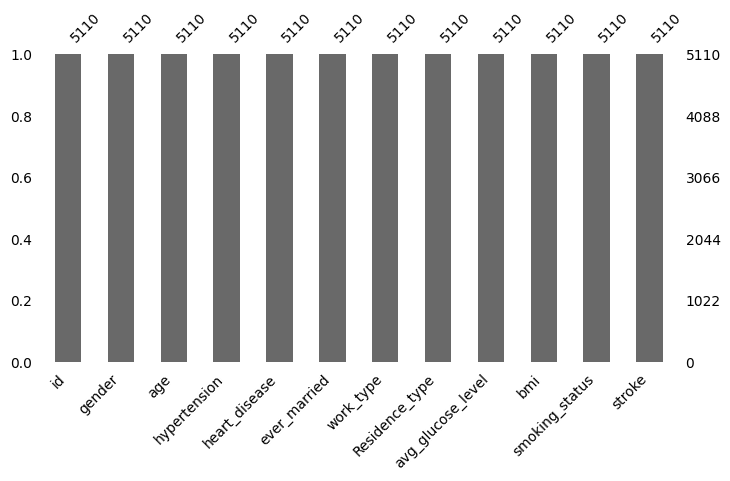

In [ ]:
plt.figure(figsize=(18,4))
axz=plt.subplot(1,2,2)
mso.bar(df, ax=axz,fontsize=10);

### Drop Irrelevent features

In [ ]:
df.drop(columns=['id'], inplace=True)
df.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


ID column was dropped as it holds no analytical value.

### Duplicates

In [ ]:
# Check for duplicates
duplicates = df.duplicated()
print("\nNumber of Duplicate Rows:", df[duplicates].shape[0])
print(df[duplicates])

df = df.drop_duplicates()


Number of Duplicate Rows: 0
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


The dataset is free from duplicates, and no further action is needed

 Data Consistency

In [ ]:
data_types = df.dtypes
data_types

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


## **Target Class Balance**

In [ ]:
df['stroke'].value_counts(normalize=True)


,proportion
stroke,
0,0.951272
1,0.048728


Stroke cases are very few compared to non-stroke cases. This needs to be addressed before modeling, or the model may favor the majority class.



## **Univariate Analysis** (Distribution of Individual Columns)

### Numerical Columns

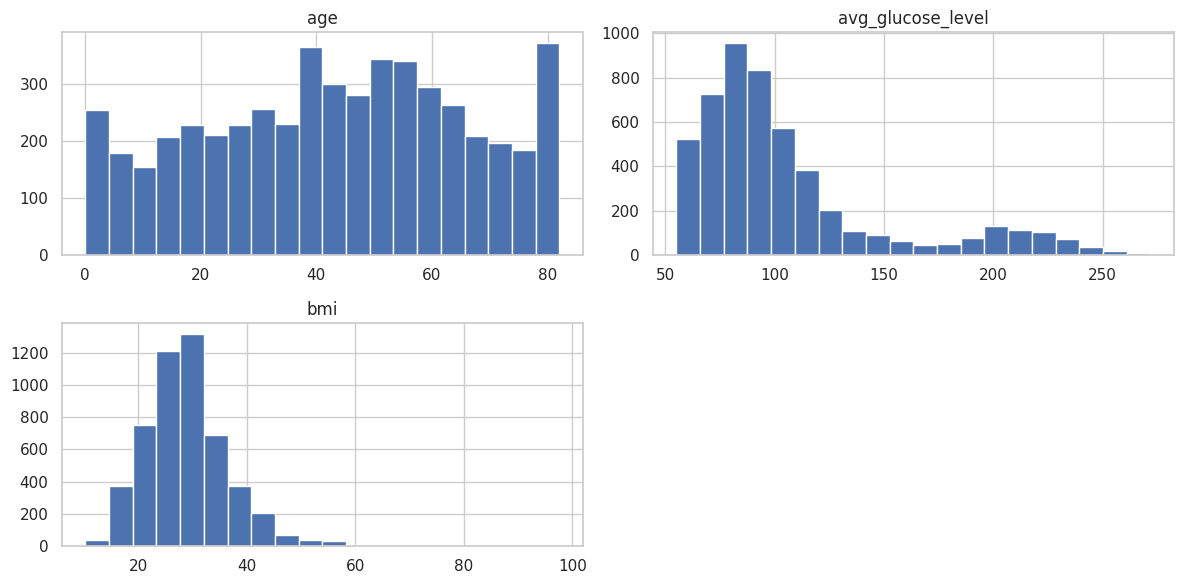

In [54]:
num_cols = ['age', 'avg_glucose_level', 'bmi']
df[num_cols].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()


Age: Right-skewed; stroke patients tend to be older.

Avg Glucose Level: A few extreme values; possible outliers in higher ranges.

BMI: Centered around 25–30; some extreme high values present.

### Categorical Columns

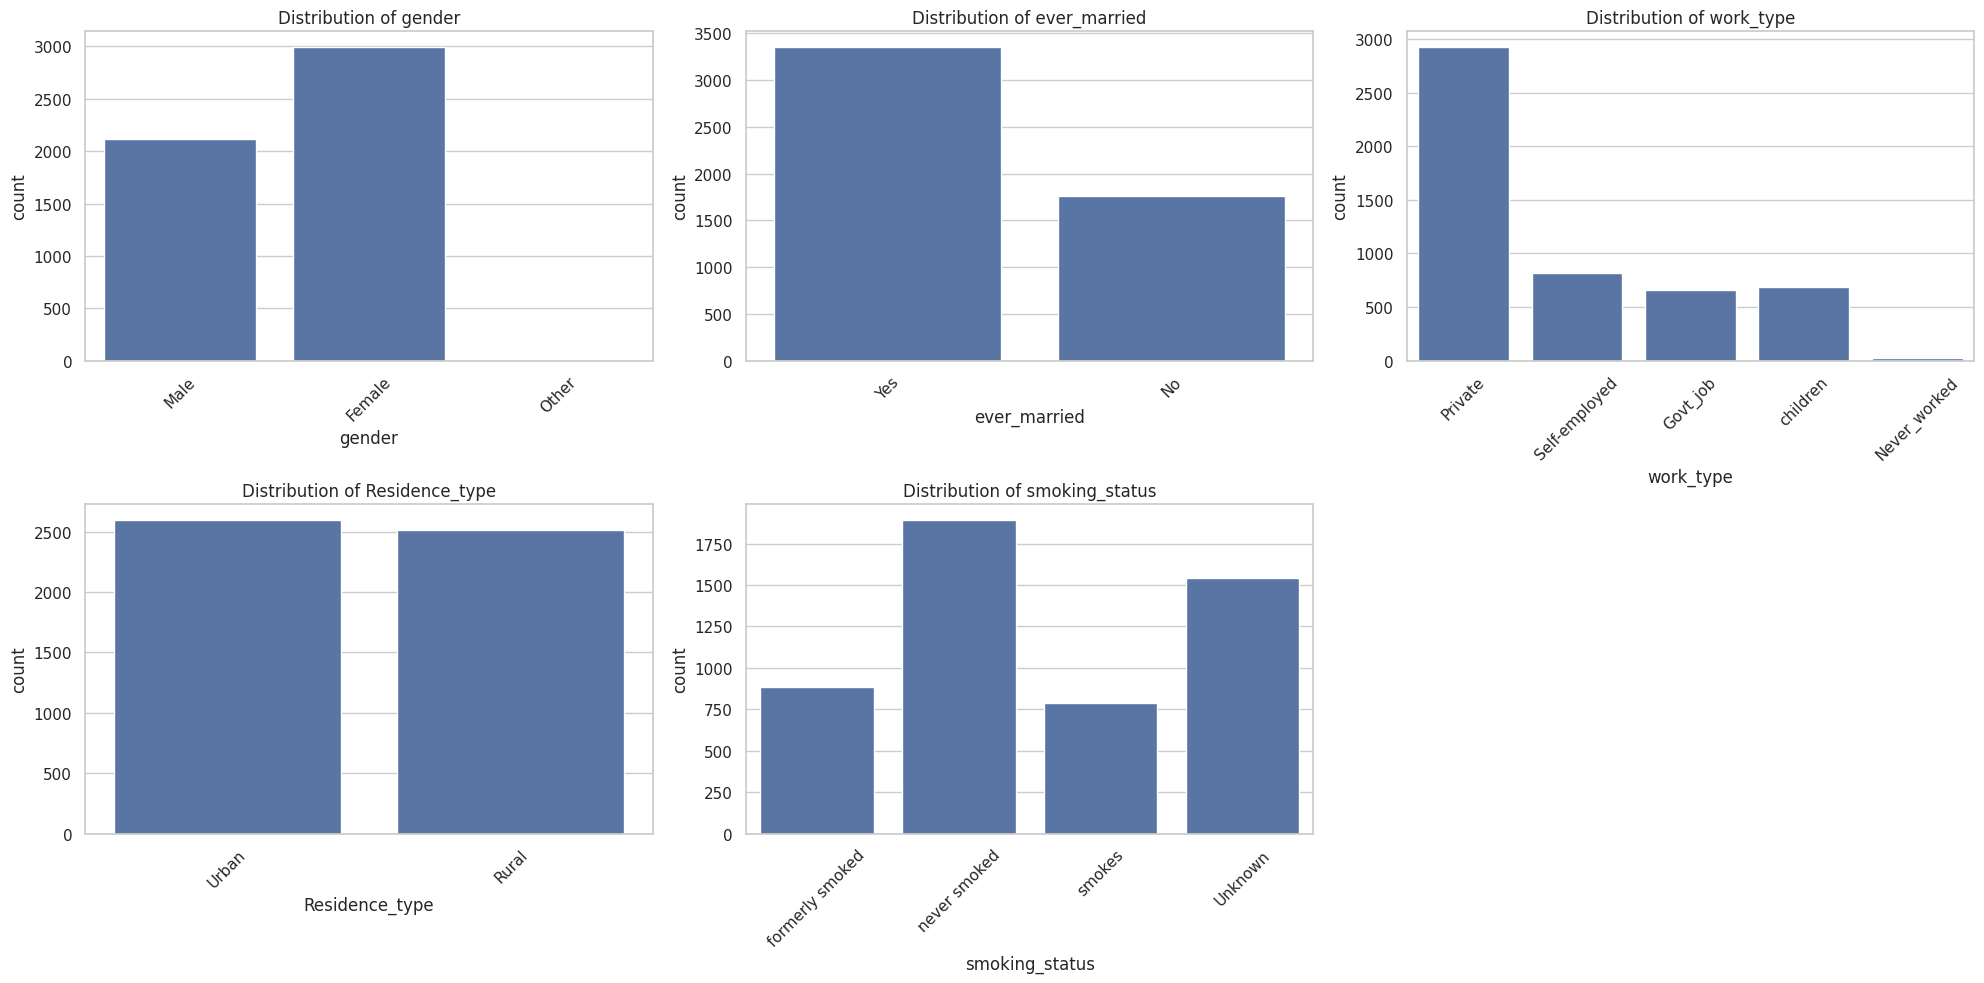

In [51]:
# Your categorical columns
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Set up the figure: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # Adjust size as needed
axes = axes.flatten()  # Make axes iterable

# Plot each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Hide the last (empty) plot cell if only 5 features
if len(cat_cols) < len(axes):
    for j in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Gender:** Slightly more females than males.

**Hypertension & Heart Disease:** Most people do not have these, but stroke cases are more frequent among those who do.

**Marital Status:** Majority are married.

**Work Type:** Most are private-sector workers; Govt job and self-employed follow.

**Residence Type:** Urban and rural are evenly split.

**Smoking Status:** Highest frequency in "never smoked", but many stroke patients appear in "formerly smoked" group.

## **Bivariate Analysis** (Stroke vs Other Features)

### Numerical Columns

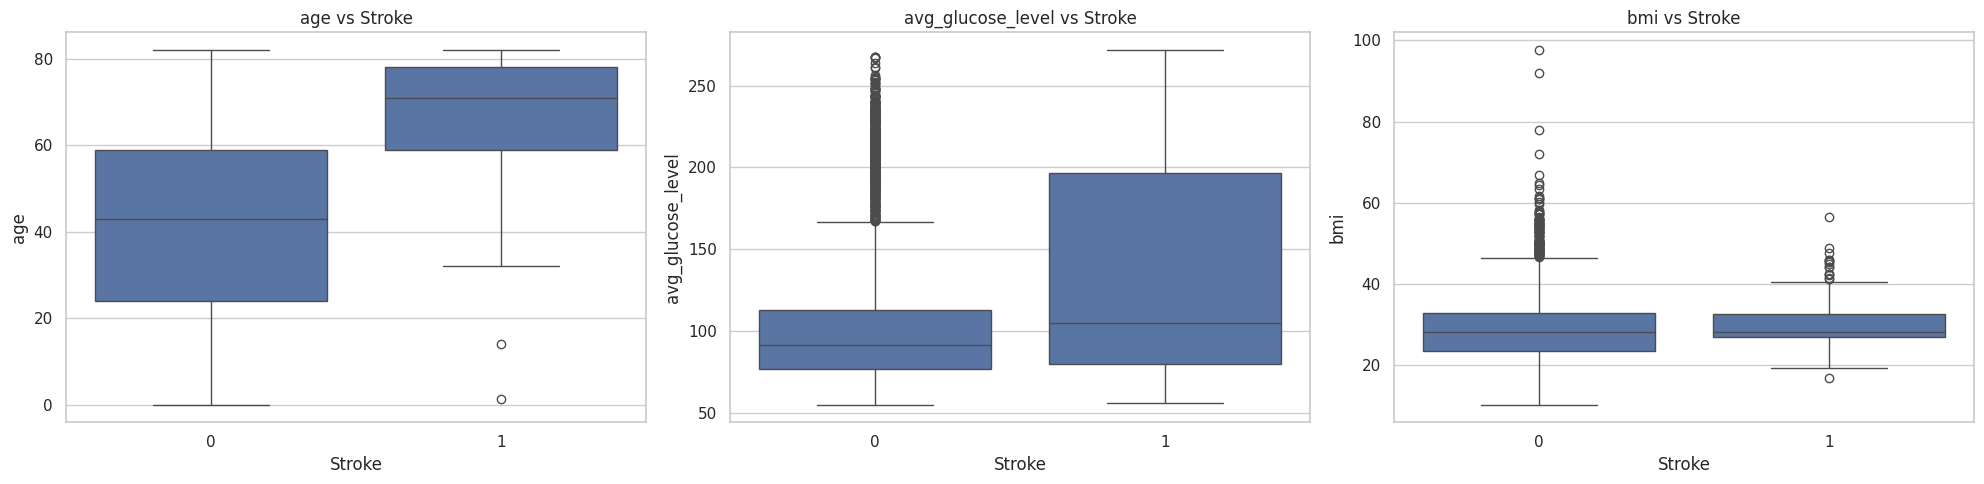

In [53]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='stroke', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Stroke')
    axes[i].set_xlabel('Stroke')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


**Age vs Stroke:** Stroke risk increases steeply after age 60.

**BMI vs Stroke:** Slight increase in stroke frequency with higher BMI, but not dramatic.

**Glucose vs Stroke:** Stroke patients have higher average glucose levels

### Categorical Columns

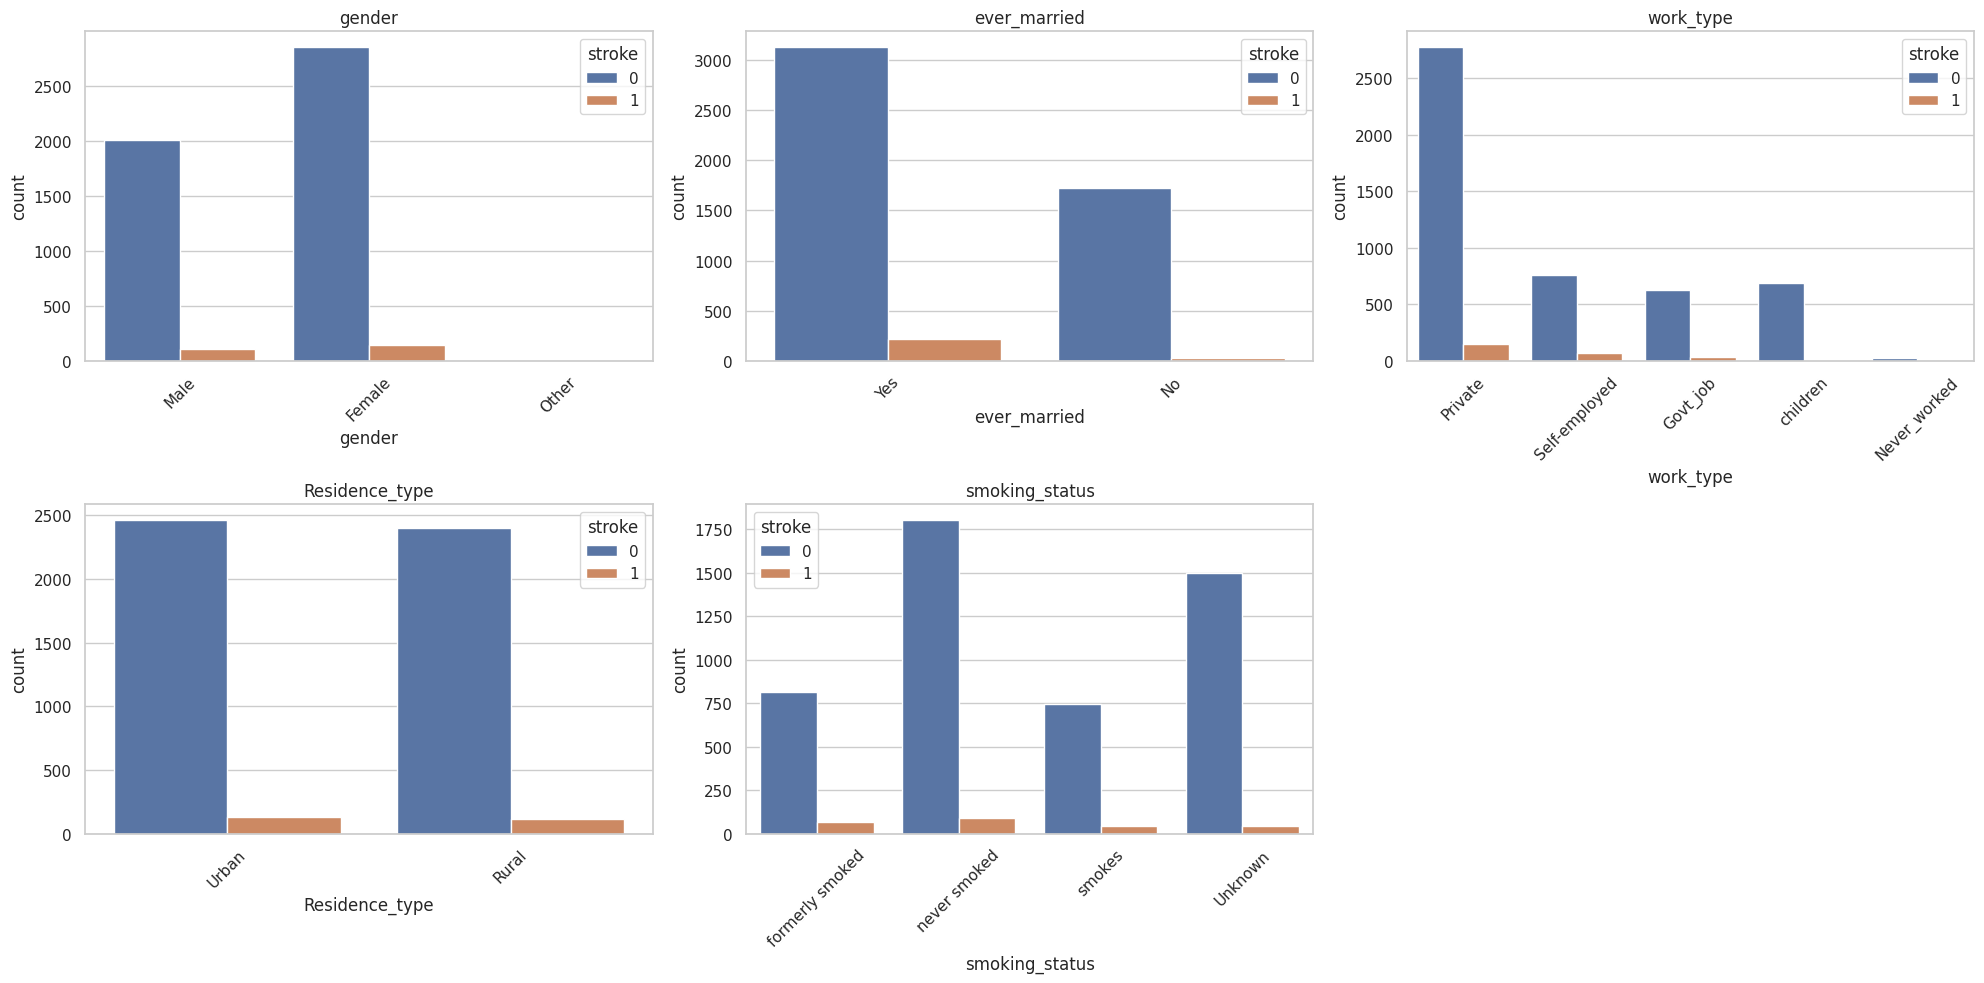

In [ ]:

cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create a 2-row, 3-column subplot grid (we'll leave 1 empty)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 rows, 3 columns

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot all 5 charts
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='stroke', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Hide the last unused (6th) subplot
fig.delaxes(axes[5])  # remove the empty 6th cell

plt.tight_layout()
plt.show()


**Heart Disease:** Strong positive association with stroke.

**Hypertension:** People with hypertension are much more likely to have strokes.

**Smoking Status:** “Formerly smoked” group has higher stroke rate.

**Work Type:** Government workers show a slightly higher stroke rate.

## **Class Imbalance Visualization**

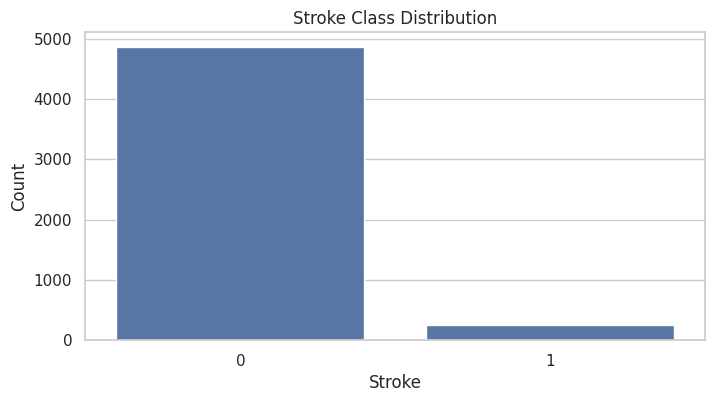

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Class Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


## **Multivariate Analysis**


In [ ]:
pd.crosstab(df['smoking_status'], df['ever_married'], normalize='index')


ever_married,No,Yes
smoking_status,,
Unknown,0.583549,0.416451
formerly smoked,0.166102,0.833898
never smoked,0.280127,0.719873
smokes,0.226869,0.773131


Age + Heart Disease + Stroke: Combined barplot/charts show:

Older individuals with heart disease have significantly higher stroke risk.

Glucose + BMI + Stroke: Higher glucose and BMI levels correlate with more stroke cases, but less clearly than age or heart disease.

## **Outlier Detection And Removal**

In [ ]:
#find an  array of numerical features of dataset

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

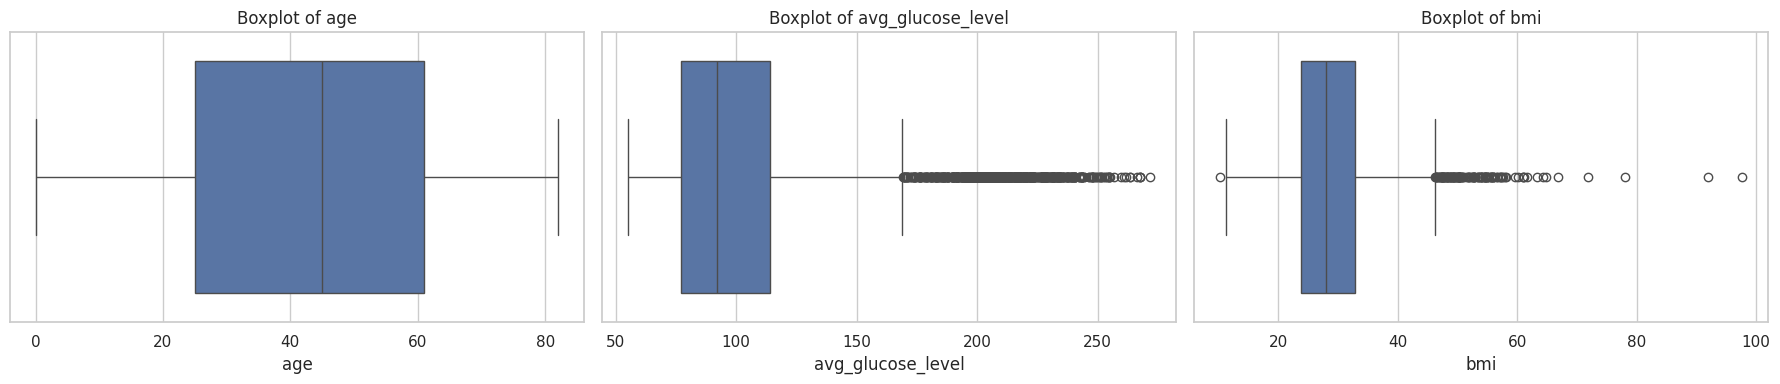

In [ ]:
#Box Plot (Visual Detection)
numerical_features = ['age', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # width=18, height=4

#Plot each feature
for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# List of numerical columns to check
numeric_columns = ['age', 'avg_glucose_level' , 'bmi']

# Dictionary to store outliers for each column
outliers_dict = {}

# Loop over columns and detect outliers
for col in numeric_columns:
    outliers = detect_outliers_iqr(df, col)
    outliers_dict[col] = outliers
    print(f'Number of outliers in {col}: {len(outliers)}')


Number of outliers in age: 0
Number of outliers in avg_glucose_level: 627
Number of outliers in bmi: 126


In [ ]:
#check if any of the same rows are outliers in multiple columns:
common_outliers = set(outliers_dict['age'].index) & set(outliers_dict['bmi'].index) & set(outliers_dict['avg_glucose_level'].index)
print(f'Number of rows that are outliers in ALL 3 columns: {len(common_outliers)}')

Number of rows that are outliers in ALL 3 columns: 0


In [ ]:
# Combine all unique outlier indices from the three columns
all_outlier_indices = set()
for col in numeric_columns:
    all_outlier_indices.update(outliers_dict[col].index)

# Remove those rows to create df_cleaned
df_cleaned = df.drop(index=all_outlier_indices).reset_index(drop=True)

print(f'\nOriginal shape: {df.shape}')
print(f'New shape after outlier removal: {df_cleaned.shape}')



Original shape: (5110, 11)
New shape after outlier removal: (4391, 11)


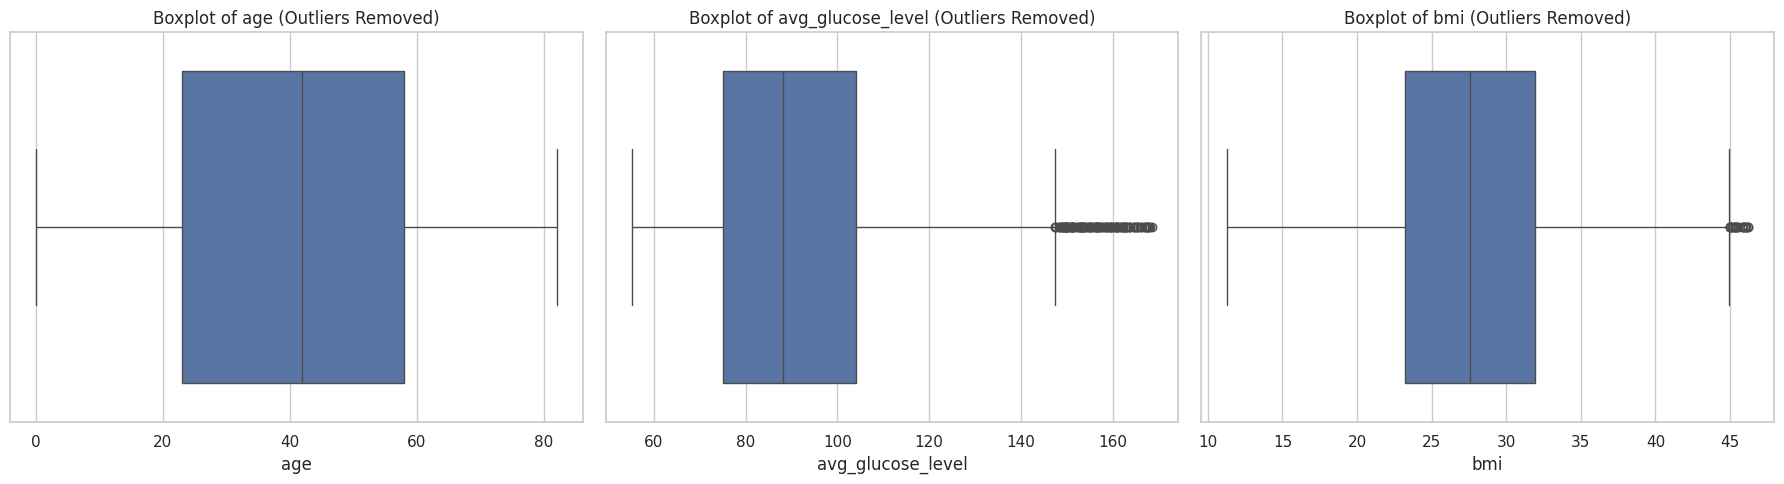

In [ ]:
# Set style
sns.set(style="whitegrid")

# Boxplots
plt.figure(figsize=(18, 5))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_cleaned[col],)
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

Outliers were detected mainly in:

BMI

Glucose Levels

## **Re-visualization of Cleaned Data**

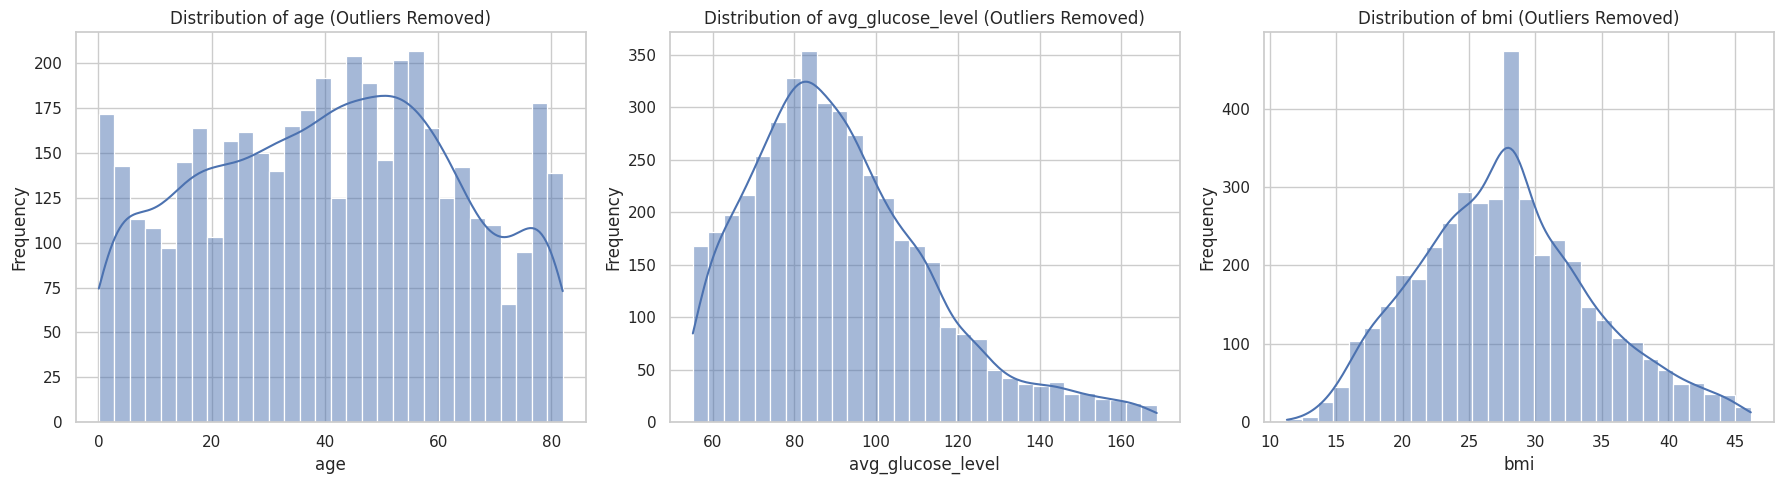

In [52]:

plt.figure(figsize=(18, 5))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_cleaned[col], bins=30, kde=True,)
    plt.title(f'Distribution of {col} (Outliers Removed)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Removing outliers helped clean up skewed distributions in histograms and KDE plots

## **Numerical Features Overview**

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  6


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


## **Descriptive Statistics**

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Age:** Mean ~43 years, wide spread from infants to elderly.

**Avg Glucose Level:** Mean around 100+, but outliers pull max above 200.

**BMI:** Mostly between 20–35, a few high extremes.

## **Correlation Heatmap**

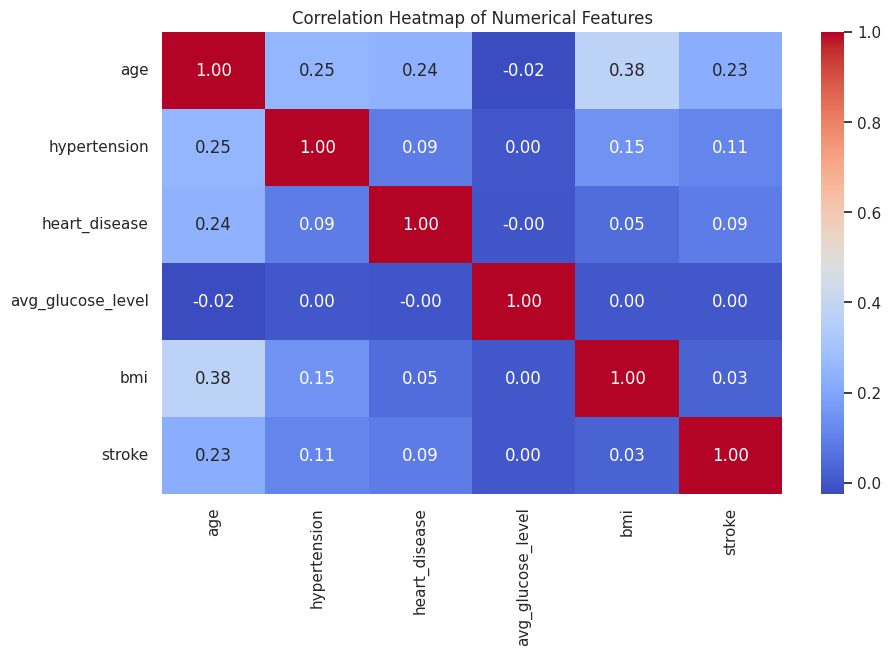

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Most features have low correlation with each other.

Age, heart disease, and hypertension have a weak but positive correlation with stroke.

## **Conclusion**

This analysis identifies age (60+), heart disease, and hypertension as the most significant risk factors for stroke. Additionally, higher glucose levels and a history of smoking are linked to increased stroke risk, with government employees showing a slightly higher incidence. The dataset also revealed a strong class imbalance, emphasizing the need for careful handling in predictive modeling